In [38]:

from main import get_dataset_positions

#obtener dataset de puntos
folder_path = r"C:\Users\Daniel_Arcos\Desktop\Visibles Cabrera"
positions = get_dataset_positions(folder_path)



In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering, SpectralClustering

#transformar en un formato apto para sklearn
X = np.array(positions)

#aplicar algoritmo de agrupamiento
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0.001, linkage='single')
model.fit_predict(X)

for u in np.unique(model.labels_):
    print(f"Cluster {u}: {np.count_nonzero(model.labels_ == u)}")

Cluster 0: 904
Cluster 1: 108
Cluster 2: 250
Cluster 3: 26
Cluster 4: 443


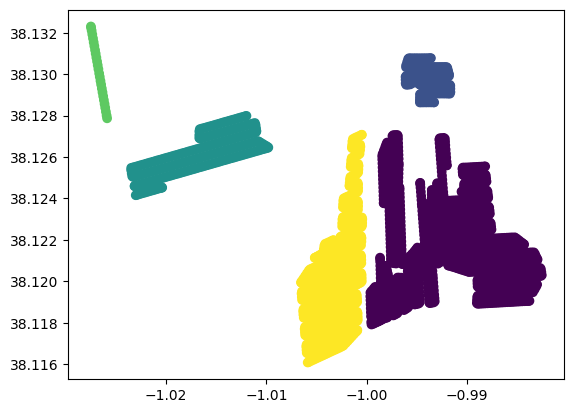

In [68]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
cmap = colormaps['viridis']
plt.scatter(X[:, 0], X[:, 1], marker='o', c=model.labels_, cmap=cmap)

In [69]:
cluster_i = 0
labeled = np.column_stack((X, model.labels_))
selected_cluster = labeled[labeled[:, -1] == cluster_i]

model_2=SpectralClustering(n_clusters=2, n_neighbors=10, affinity='nearest_neighbors')
model_2.fit_predict(selected_cluster[:, :2])

for u in np.unique(model_2.labels_):
    print(f"Cluster {u}: {np.count_nonzero(model_2.labels_ == u)}")

Cluster 0: 291
Cluster 1: 613


c:\Repos_\image_processing\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


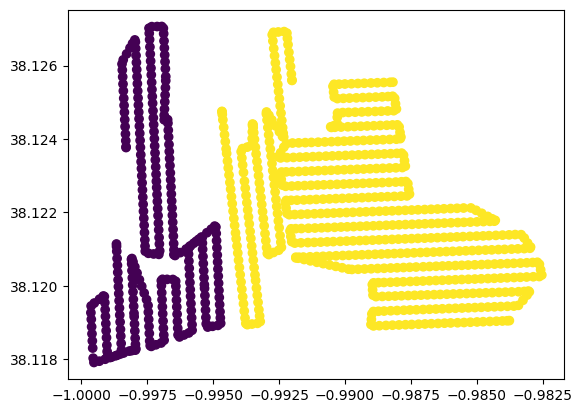

In [70]:
plt.scatter(selected_cluster[:, 0], selected_cluster[:, 1], marker='o', c=model_2.labels_, cmap=cmap)

In [62]:
metros = 100
latitud = 40.0  # Por ejemplo, Madrid

# Conversión a grados
grados_lat = metros / 111320
grados_lon = metros / (111320 * np.cos(np.radians(latitud)))

print("500 metros ≈", grados_lat, "grados de latitud")
print("500 metros ≈", grados_lon, "grados de longitud en latitud 40°")

500 metros ≈ 0.0008983111749910168 grados de latitud
500 metros ≈ 0.0011726619559219175 grados de longitud en latitud 40°
